In [1]:
import principal_portfolios as pp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# FX DATA:

In [2]:
# I did not put this function in the other file. Because it is very specific and is designed for my data.
def process_fx_dataset(adress):
    df = pd.read_excel(adress, skiprows=2)
    df = pp.invert_usd_columns(df)
    df = df.rename(columns={"Currency":"date"})
    df['date'] = pp.convert_date_column_for_monthly_data(df)
    return df

In [3]:
# Importing spot data of developed currencies
data_to_read_address = ["data/developed_countries_spot_monthly_1996_2024.xlsx",
                        "data/developed_countries_futures_monthly_1996_2024.xlsx"]
dataset_spot = data_to_read_address[0]
dataset_futures = data_to_read_address[1]

developed_countries_spot_monthly = process_fx_dataset(dataset_spot)
developed_countries_futures_monthly = process_fx_dataset(dataset_futures)

In [4]:
developed_countries_futures_monthly.head(20)

,date,AUD,CAD,EUR,JPY,NZD,NOK,SEK,CHF,GBP
0,1996-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1996-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1996-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1996-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1996-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1996-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1996-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1996-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1996-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1996-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Simple returns + momentum as signal

dict_keys(['developed_countries_spot_monthly_1996_2024'])
dict_keys(['realized_returns_df', 'sharpe_df', 'pp_realized_mean_df', 'pp_expected_mean_df', 'pep_realized_mean_df', 'pep_expected_mean_df', 'pap_realized_mean_df', 'pap_expected_mean_df'])
return_of_simple_factor          -0.198176
realized_return_of_first_n_PP    -0.203159
realized_return_of_first_n_PEP   -0.156971
realized_return_of_first_n_PAP    0.203066
realized_return_of_1_PP          -0.053295
realized_return_of_1_PEP         -0.329129
realized_return_of_2_PP          -0.257533
realized_return_of_2_PEP          0.230535
realized_return_of_3_PP           0.097938
realized_return_of_3_PEP         -0.360999
realized_return_of_4_PP           0.024059
realized_return_of_4_PEP         -0.136438
realized_return_of_5_PP           0.075797
realized_return_of_5_PEP         -0.048300
realized_return_of_6_PP           0.072421
realized_return_of_6_PEP         -0.172278
realized_return_of_7_PP           0.112109
realized_return_of_7_

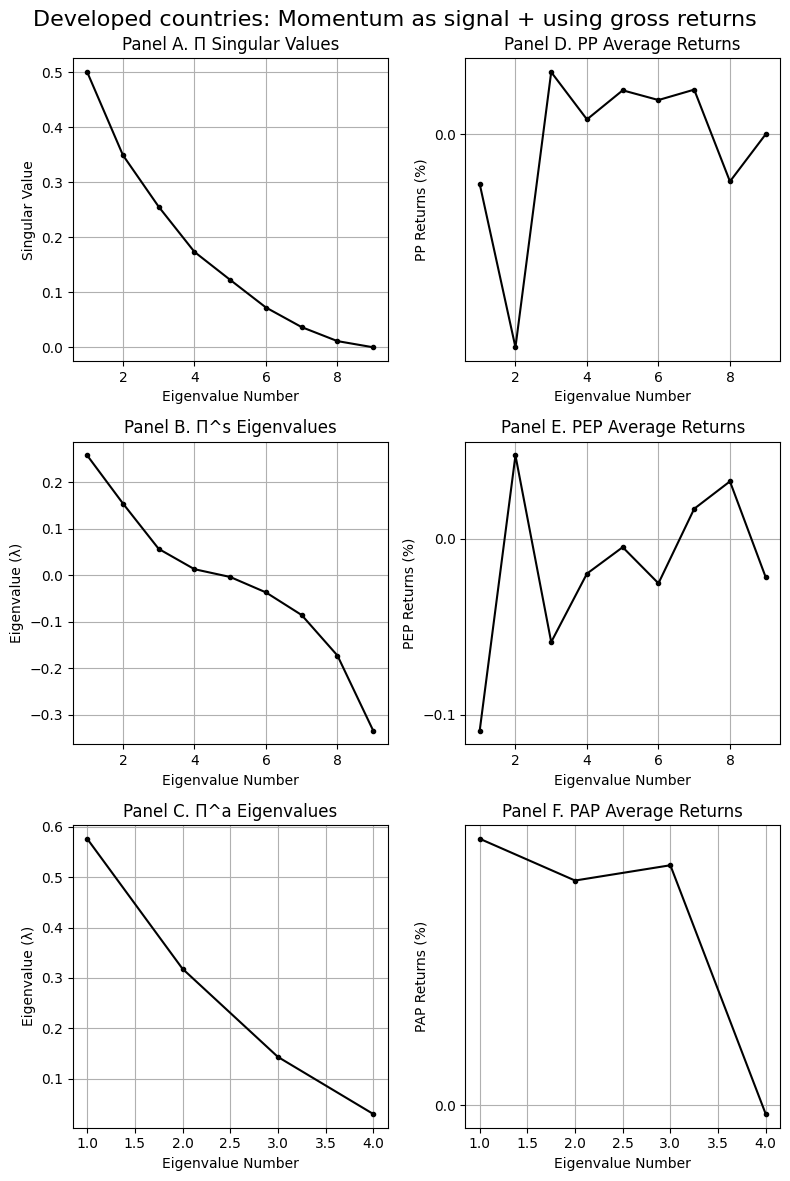

In [7]:
starting_year_to_filter = 1995
end_year_to_filter = 2024
number_of_lookback_periods = 60
number_of_PPs_to_consider = 2
number_of_PEPs_to_consider = 2
number_of_PAPs_to_consider = 3
output_dict = {}

developed_countries_simple_return_monthly = pp.calculate_log_FX_excess_returns(developed_countries_spot_monthly,developed_countries_spot_monthly)
# using past month's momentum as the signal
signal_df = pp.build_signal_df_for_1month_momentum(developed_countries_simple_return_monthly)
portfolios_key = dataset_spot.split("/")[1].split(".xlsx")[0]
output_dict[portfolios_key] = pp.build_PP(developed_countries_simple_return_monthly,signal_df,
                                                                   number_of_lookback_periods,starting_year_to_filter,end_year_to_filter,
                                                                   factor_data_monthly=None, number_of_PPs_to_consider=number_of_PPs_to_consider,
                                                                   number_of_PEPs_to_consider=number_of_PEPs_to_consider, 
                                                                   number_of_PAPs_to_consider= number_of_PAPs_to_consider)

# I calculate the results for all datasets. the results are stored in this dictionay.
print(output_dict.keys())
'''
Every value of this dictionary is itself another dictionary.
For instance the key 'sharpe_df' can be used to access the sharp values of this set of results.
'''
print(output_dict[portfolios_key].keys())
print(output_dict[portfolios_key]["sharpe_df"])

number_of_portfolios = developed_countries_simple_return_monthly.shape[1]
title = 'Developed countries: Momentum as signal + using gross returns'

pp.singular_values_vs_realized_returns_graph(output_dict, portfolios_key, number_of_portfolios, title)

dict_keys(['developed_countries_excess_returns_monthly'])
dict_keys(['realized_returns_df', 'sharpe_df', 'pp_realized_mean_df', 'pp_expected_mean_df', 'pep_realized_mean_df', 'pep_expected_mean_df', 'pap_realized_mean_df', 'pap_expected_mean_df'])
return_of_simple_factor          -0.038235
realized_return_of_first_n_PP    -0.074523
realized_return_of_first_n_PEP    0.029918
realized_return_of_first_n_PAP    0.307167
realized_return_of_1_PP           0.034277
realized_return_of_1_PEP         -0.151476
realized_return_of_2_PP          -0.156939
realized_return_of_2_PEP          0.325968
realized_return_of_3_PP           0.286456
realized_return_of_3_PEP         -0.286186
realized_return_of_4_PP          -0.022768
realized_return_of_4_PEP         -0.116206
realized_return_of_5_PP           0.070672
realized_return_of_5_PEP         -0.118029
realized_return_of_6_PP           0.150687
realized_return_of_6_PEP         -0.150258
realized_return_of_7_PP           0.103653
realized_return_of_7_

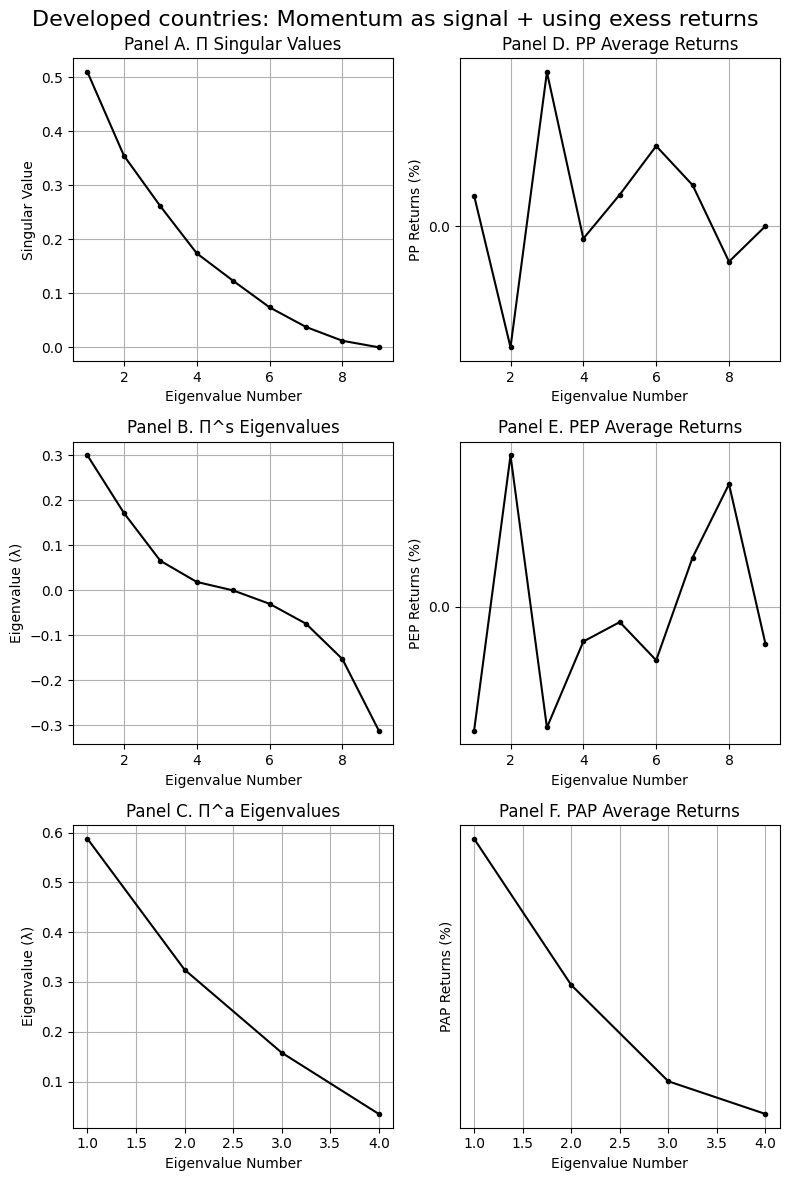

In [13]:
starting_year_to_filter = 1998
end_year_to_filter = 2024
number_of_lookback_periods = 60
number_of_PPs_to_consider = 2
number_of_PEPs_to_consider = 2
number_of_PAPs_to_consider = 3
output_dict = {}

developed_countries_excess_return_monthly = pp.calculate_log_FX_excess_returns(developed_countries_spot_monthly,developed_countries_futures_monthly).dropna()
# using past month's momentum as the signal
signal_df = pp.build_signal_df_for_1month_momentum(developed_countries_excess_return_monthly).dropna()
portfolios_key = "developed_countries_excess_returns_monthly"
output_dict[portfolios_key] = pp.build_PP(developed_countries_excess_return_monthly,signal_df,
                                                                   number_of_lookback_periods,starting_year_to_filter,end_year_to_filter,
                                                                   factor_data_monthly=None, number_of_PPs_to_consider=number_of_PPs_to_consider,
                                                                   number_of_PEPs_to_consider=number_of_PEPs_to_consider, 
                                                                   number_of_PAPs_to_consider= number_of_PAPs_to_consider)

# I calculate the results for all datasets. the results are stored in this dictionay.
print(output_dict.keys())
'''
Every value of this dictionary is itself another dictionary.
For instance the key 'sharpe_df' can be used to access the sharp values of this set of results.
'''
print(output_dict[portfolios_key].keys())
print(output_dict[portfolios_key]["sharpe_df"])

number_of_portfolios = developed_countries_excess_return_monthly.shape[1]
title = 'Developed countries: Momentum as signal + using exess returns'

pp.singular_values_vs_realized_returns_graph(output_dict, portfolios_key, number_of_portfolios, title)

# Fama French Test Assets

In [14]:
# adresses to read the files
data_to_read_address = ["data/25_Portfolios_5x5_SizeBM_monthly.csv",
                        "data/25_Portfolios_5x5_SizeOP_monthly.csv",
                        "data/25_Portfolios_5x5_SizeINV_monthly.csv"]
factor_data_address = "data/F-F_Research_Data_5_Factors_2x3.csv"

# initialize function parameters
starting_year_to_filter = 1963
end_year_to_filter = 2020
number_of_lookback_periods = 120
number_of_PPs_to_consider = 3
number_of_PEPs_to_consider = 3
number_of_PAPs_to_consider = 3


# Reading FF factor data
factor_data_monthly = pd.read_csv(factor_data_address)
factor_data_monthly['date'] = pp.convert_date_column_for_monthly_data(factor_data_monthly)

output_dict = {}
for dataset in data_to_read_address:

    # Reading asset returns.
    portfolios_dataset_df = pd.read_csv(dataset)
    portfolios_dataset_df['date'] = pp.convert_date_column_for_monthly_data(portfolios_dataset_df)
    signal_df = pp.build_signal_df_for_1month_momentum(portfolios_dataset_df)
    

    output_dict[dataset.split("/")[1].split(".csv")[0]] = pp.build_PP(portfolios_dataset_df,signal_df,
                                                                   number_of_lookback_periods,starting_year_to_filter,end_year_to_filter,
                                                                   factor_data_monthly=factor_data_monthly)

# I calculate the results for all datasets. the results are stored in this dictionay.
print(output_dict.keys())
'''
Every value of this dictionary is itself another dictionary.
For instance the key 'sharpe_df' can be used to access the sharp values of this set of results.
'''
print(output_dict['25_Portfolios_5x5_SizeBM_monthly'].keys())
# output_dict['25_Portfolios_5x5_SizeBM_monthly']["sharpe_df"]

dict_keys(['25_Portfolios_5x5_SizeBM_monthly', '25_Portfolios_5x5_SizeOP_monthly', '25_Portfolios_5x5_SizeINV_monthly'])
dict_keys(['realized_returns_df', 'sharpe_df', 'pp_realized_mean_df', 'pp_expected_mean_df', 'pep_realized_mean_df', 'pep_expected_mean_df', 'pap_realized_mean_df', 'pap_expected_mean_df', 'regression_result_return_of_simple_factor', 'regression_result_realized_return_of_first_n_PP', 'regression_result_realized_return_of_first_n_PEP', 'regression_result_realized_return_of_first_n_PAP', 'regression_result_PEP and PAP 1-n'])


Plotting the graphs

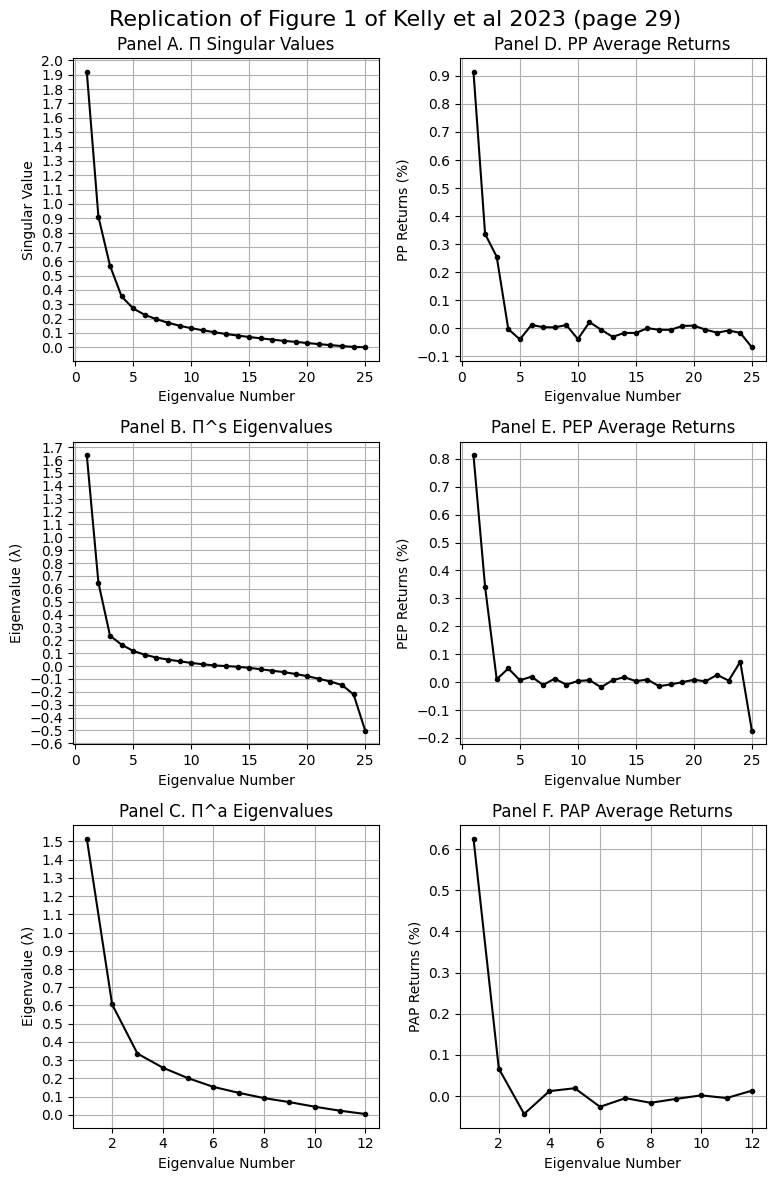

In [15]:
number_of_portfolios = portfolios_dataset_df.shape[1]
portfolios_key = "25_Portfolios_5x5_SizeBM_monthly"
title = 'Replication of Figure 1 of Kelly et al 2023 (page 29)'

pp.singular_values_vs_realized_returns_graph(output_dict, portfolios_key, number_of_portfolios, title)

Below is the replicated figure.

![alt text](Replicated_tables_or_figures/Figure_1.jpg)


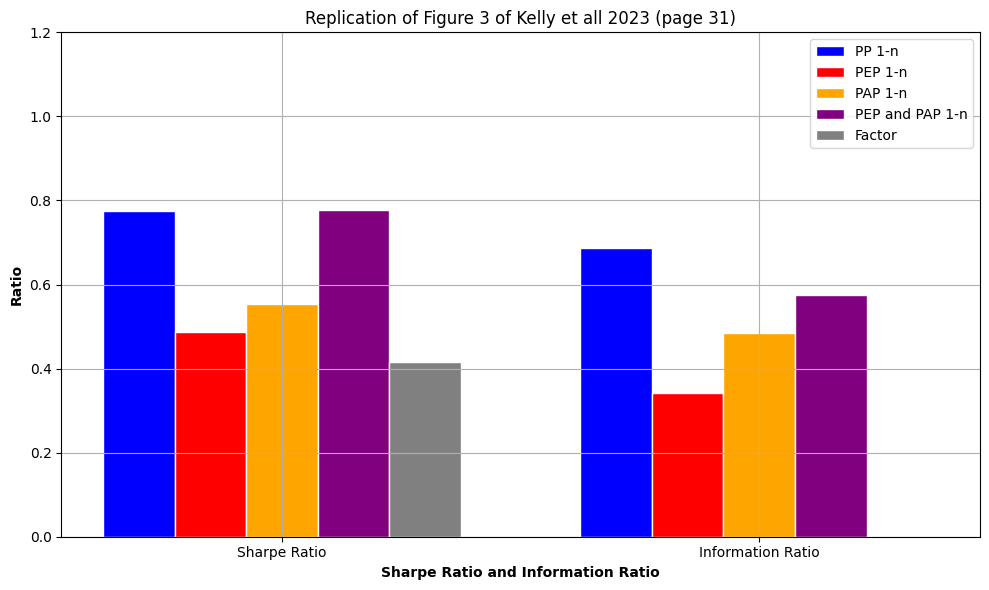

In [16]:
categories = ['Sharpe Ratio', 'Information Ratio']
bar_width = 0.15

# Data for each group (Sharpe Ratio and Information Ratio)
means_pp = [output_dict['25_Portfolios_5x5_SizeBM_monthly']["sharpe_df"].get('realized_return_of_first_n_PP'),
            output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_realized_return_of_first_n_PP"][2]]
means_pep = [output_dict['25_Portfolios_5x5_SizeBM_monthly']["sharpe_df"].get('realized_return_of_first_n_PEP'),
              output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_realized_return_of_first_n_PEP"][2]]
means_pap = [output_dict['25_Portfolios_5x5_SizeBM_monthly']["sharpe_df"].get('realized_return_of_first_n_PAP'),
              output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_realized_return_of_first_n_PAP"][2]]
means_pep_pap = [output_dict['25_Portfolios_5x5_SizeBM_monthly']["sharpe_df"].get('PEP and PAP 1-n'),
                 output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_PEP and PAP 1-n"][2]]
means_factor = [output_dict['25_Portfolios_5x5_SizeBM_monthly']["sharpe_df"].get('return_of_simple_factor'),0]

# The position of the bars on the x-axis
r1 = np.arange(len(categories))  # for PP
r2 = [x + bar_width for x in r1]  # for PEP
r3 = [x + bar_width for x in r2]  # for PAP
r4 = [x + bar_width for x in r3]  # for PEP and PAP
r5 = [x + bar_width for x in r4]  # for Factor

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Add bars for each category without error bars
ax.bar(r1, means_pp, color='blue', width=bar_width, edgecolor='white', label='PP 1-n')
ax.bar(r2, means_pep, color='red', width=bar_width, edgecolor='white', label='PEP 1-n')
ax.bar(r3, means_pap, color='orange', width=bar_width, edgecolor='white', label='PAP 1-n')
ax.bar(r4, means_pep_pap, color='purple', width=bar_width, edgecolor='white', label='PEP and PAP 1-n')
ax.bar(r5, means_factor, color='gray', width=bar_width, edgecolor='white', label='Factor')

# Setting maximum value of Y-axis
ax.set_ylim([0, 1.2])
# Add labels
ax.set_xlabel('Sharpe Ratio and Information Ratio', fontweight='bold')
ax.set_ylabel('Ratio', fontweight='bold')
ax.set_title('Replication of Figure 3 of Kelly et all 2023 (page 31)')

# Add ticks on the x-axis
ax.set_xticks([r + 2*bar_width for r in range(len(categories))])
ax.set_xticklabels(categories)

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


Below is the replicated figure.

![alt text](Replicated_tables_or_figures/Figure_3.jpg)


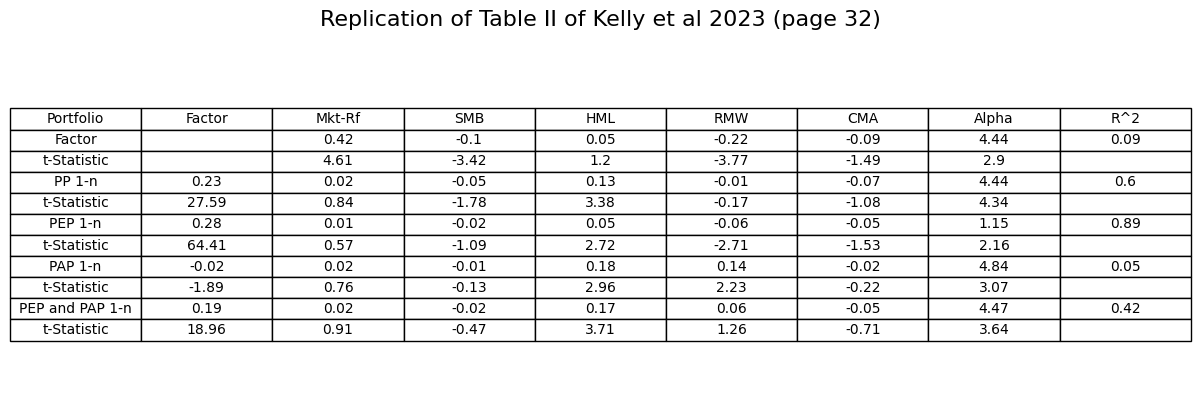

In [10]:
import pandas as pd


# Define the data as a series of lists (each list is a row)
rows = [
    ['Factor',''] + 
    [round(num, 2) for num in output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_return_of_simple_factor"][0].tolist()]
    + [round(output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_return_of_simple_factor"][3],2)],
    ['t-Statistic',''] + [round(num, 2) for num in output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_return_of_simple_factor"][1].tolist()] + [''] ,

    ['PP 1-n'] + 
    [round(num, 2) for num in output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_realized_return_of_first_n_PP"][0].tolist()] +
    [round(output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_realized_return_of_first_n_PP"][3],2)],
    ['t-Statistic'] + [round(num, 2) for num in output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_realized_return_of_first_n_PP"][1].tolist()] ,

    ['PEP 1-n']+
    [round(num, 2) for num in output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_realized_return_of_first_n_PEP"][0].tolist()]+
    [round(output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_realized_return_of_first_n_PEP"][3],2)],
    ['t-Statistic'] + [round(num, 2) for num in output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_realized_return_of_first_n_PEP"][1].tolist()],

    ['PAP 1-n']+
    [round(num, 2) for num in output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_realized_return_of_first_n_PAP"][0].tolist()]+
    [round(output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_realized_return_of_first_n_PAP"][3],2)],
    ['t-Statistic'] + [round(num, 2) for num in output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_realized_return_of_first_n_PAP"][1].tolist()],

    ['PEP and PAP 1-n'] +
    [round(num, 2) for num in output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_PEP and PAP 1-n"][0].tolist()]+
    [round(output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_PEP and PAP 1-n"][3],2)],
    ['t-Statistic'] + [round(num, 2) for num in output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_PEP and PAP 1-n"][1].tolist()]
]

# My ordering of columns when saving the results of regressions is different from Kelly's paper. I do this to make comparison's easier.
rows[0][7],rows[0][2] = rows[0][2], rows[0][7]
rows[1][7],rows[1][2] = rows[1][2], rows[1][7]
for row in rows[2:]:
    row[1], row[7] = row[7], row[1]  

# Define the column names
columns = ['Portfolio', 'Factor', 'Mkt-Rf', 'SMB', 'HML', 'RMW', 'CMA', 'Alpha','R^2']

# Convert the rows into a pandas DataFrame
df = pd.DataFrame(rows, columns=columns)

# Create a matplotlib figure to render the table
fig, ax = plt.subplots(figsize=(12, 4))  # Adjust size as needed
ax.axis('tight')
ax.axis('off')

# Create the table and display it
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Set font size and adjust the scale of the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

fig.suptitle("Replication of Table II of Kelly et al 2023 (page 32)", fontsize=16)

# Adjust layout to prevent overlap between title and table
plt.tight_layout()

# Adjust the title position to avoid overlap with the table
fig.subplots_adjust(top=0.85)


plt.show()


Below is the replicated table

![alt text](Replicated_tables_or_figures/Table_2.jpg)


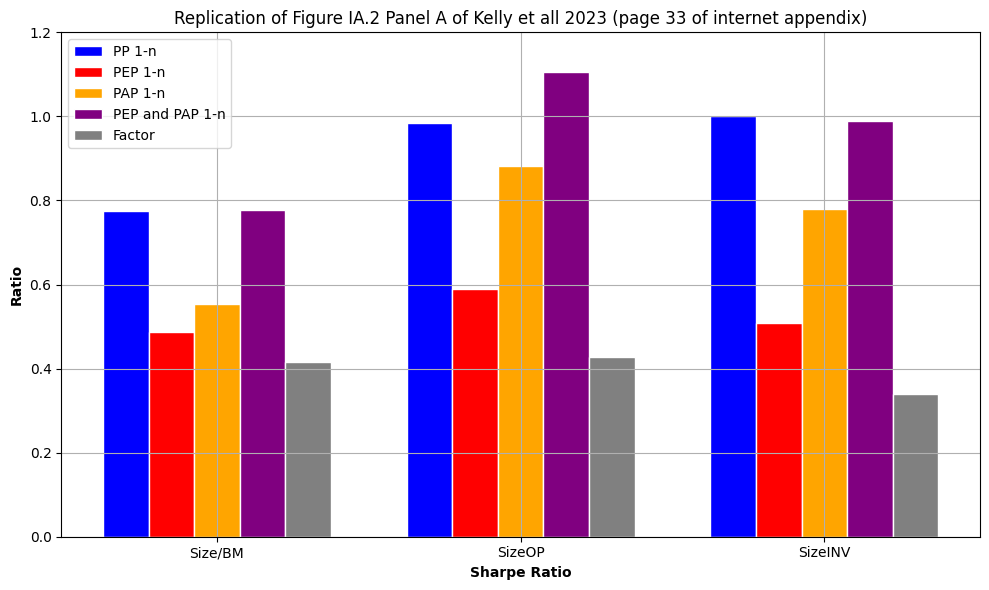

In [11]:
categories = ['Size/BM', 'SizeOP', 'SizeINV']  # Add the new category
bar_width = 0.15

# Data for each group (Sharpe Ratio and Information Ratio) including the new category data
means_pp = [output_dict['25_Portfolios_5x5_SizeBM_monthly']["sharpe_df"].get('realized_return_of_first_n_PP'),
            output_dict['25_Portfolios_5x5_SizeOP_monthly']["sharpe_df"].get('realized_return_of_first_n_PP'),
            output_dict['25_Portfolios_5x5_SizeINV_monthly']["sharpe_df"].get('realized_return_of_first_n_PP')]  # Add data for new category
means_pep = [output_dict['25_Portfolios_5x5_SizeBM_monthly']["sharpe_df"].get('realized_return_of_first_n_PEP'),
              output_dict['25_Portfolios_5x5_SizeOP_monthly']["sharpe_df"].get('realized_return_of_first_n_PEP'),
              output_dict['25_Portfolios_5x5_SizeINV_monthly']["sharpe_df"].get('realized_return_of_first_n_PEP')]  # Add data for new category
means_pap = [output_dict['25_Portfolios_5x5_SizeBM_monthly']["sharpe_df"].get('realized_return_of_first_n_PAP'),
              output_dict['25_Portfolios_5x5_SizeOP_monthly']["sharpe_df"].get('realized_return_of_first_n_PAP'),
              output_dict['25_Portfolios_5x5_SizeINV_monthly']["sharpe_df"].get('realized_return_of_first_n_PAP')]  # Add data for new category
means_pep_pap = [output_dict['25_Portfolios_5x5_SizeBM_monthly']["sharpe_df"].get('PEP and PAP 1-n'),
                 output_dict['25_Portfolios_5x5_SizeOP_monthly']["sharpe_df"].get('PEP and PAP 1-n'),
                 output_dict['25_Portfolios_5x5_SizeINV_monthly']["sharpe_df"].get('PEP and PAP 1-n')]  # Add data for new category
means_factor = [output_dict['25_Portfolios_5x5_SizeBM_monthly']["sharpe_df"].get('return_of_simple_factor'),
                output_dict['25_Portfolios_5x5_SizeOP_monthly']["sharpe_df"].get('return_of_simple_factor'),
                output_dict['25_Portfolios_5x5_SizeINV_monthly']["sharpe_df"].get('return_of_simple_factor')]  # Add data for new category

# The position of the bars on the x-axis
r1 = np.arange(len(categories))  # for PP
r2 = [x + bar_width for x in r1]  # for PEP
r3 = [x + bar_width for x in r2]  # for PAP
r4 = [x + bar_width for x in r3]  # for PEP and PAP
r5 = [x + bar_width for x in r4]  # for Factor

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Add bars for each category without error bars
ax.bar(r1, means_pp, color='blue', width=bar_width, edgecolor='white', label='PP 1-n')
ax.bar(r2, means_pep, color='red', width=bar_width, edgecolor='white', label='PEP 1-n')
ax.bar(r3, means_pap, color='orange', width=bar_width, edgecolor='white', label='PAP 1-n')
ax.bar(r4, means_pep_pap, color='purple', width=bar_width, edgecolor='white', label='PEP and PAP 1-n')
ax.bar(r5, means_factor, color='gray', width=bar_width, edgecolor='white', label='Factor')

# Setting maximum value of Y-axis
ax.set_ylim([0, 1.2])
# Add labels
ax.set_xlabel('Sharpe Ratio', fontweight='bold')
ax.set_ylabel('Ratio', fontweight='bold')
ax.set_title('Replication of Figure IA.2 Panel A of Kelly et all 2023 (page 33 of internet appendix)')

# Add ticks on the x-axis
ax.set_xticks([r + 2*bar_width for r in range(len(categories))])
ax.set_xticklabels(categories)

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


Below is the replicated figure.

![alt text](Replicated_tables_or_figures/IA_2_PANEL_A.jpg)


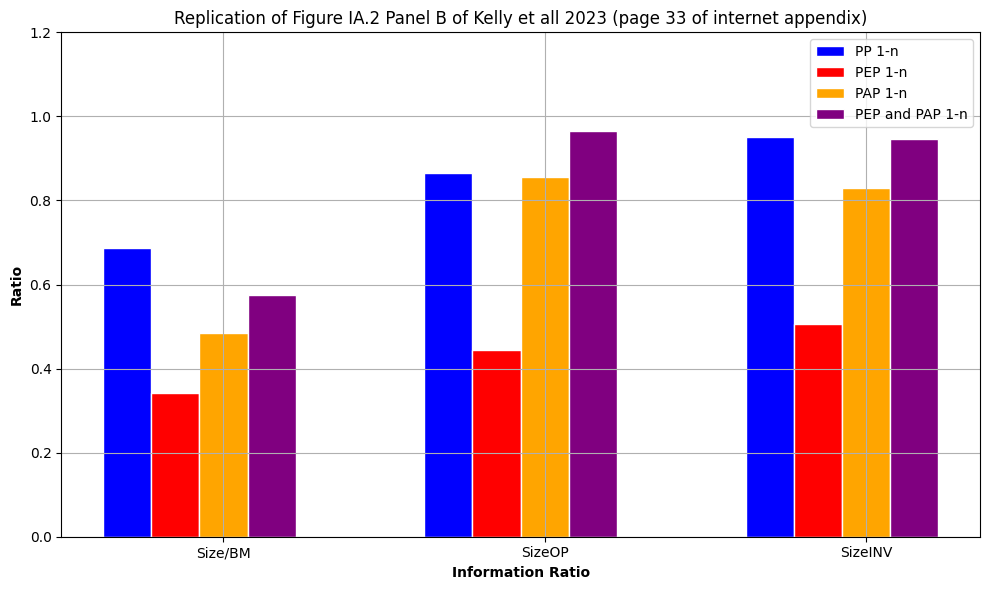

In [12]:
categories = ['Size/BM', 'SizeOP', 'SizeINV']  # Add the new category
bar_width = 0.15

# Data for each group (Sharpe Ratio and Information Ratio) including the new category data
means_pp = [output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_realized_return_of_first_n_PP"][2],
            output_dict['25_Portfolios_5x5_SizeOP_monthly']["regression_result_realized_return_of_first_n_PP"][2],
            output_dict['25_Portfolios_5x5_SizeINV_monthly']["regression_result_realized_return_of_first_n_PP"][2]]  # Add data for new category
means_pep = [output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_realized_return_of_first_n_PEP"][2],
            output_dict['25_Portfolios_5x5_SizeOP_monthly']["regression_result_realized_return_of_first_n_PEP"][2],
            output_dict['25_Portfolios_5x5_SizeINV_monthly']["regression_result_realized_return_of_first_n_PEP"][2]]  # Add data for new category
means_pap = [output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_realized_return_of_first_n_PAP"][2],
            output_dict['25_Portfolios_5x5_SizeOP_monthly']["regression_result_realized_return_of_first_n_PAP"][2],
            output_dict['25_Portfolios_5x5_SizeINV_monthly']["regression_result_realized_return_of_first_n_PAP"][2]]  # Add data for new category
means_pep_pap = [output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_PEP and PAP 1-n"][2],
                 output_dict['25_Portfolios_5x5_SizeOP_monthly']["regression_result_PEP and PAP 1-n"][2],
                 output_dict['25_Portfolios_5x5_SizeINV_monthly']["regression_result_PEP and PAP 1-n"][2]]  # Add data for new category


# The position of the bars on the x-axis
r1 = np.arange(len(categories))  # for PP
r2 = [x + bar_width for x in r1]  # for PEP
r3 = [x + bar_width for x in r2]  # for PAP
r4 = [x + bar_width for x in r3]  # for PEP and PAP


# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Add bars for each category without error bars
ax.bar(r1, means_pp, color='blue', width=bar_width, edgecolor='white', label='PP 1-n')
ax.bar(r2, means_pep, color='red', width=bar_width, edgecolor='white', label='PEP 1-n')
ax.bar(r3, means_pap, color='orange', width=bar_width, edgecolor='white', label='PAP 1-n')
ax.bar(r4, means_pep_pap, color='purple', width=bar_width, edgecolor='white', label='PEP and PAP 1-n')


# Setting maximum value of Y-axis
ax.set_ylim([0, 1.2])
# Add labels
ax.set_xlabel('Information Ratio', fontweight='bold')
ax.set_ylabel('Ratio', fontweight='bold')
ax.set_title('Replication of Figure IA.2 Panel B of Kelly et all 2023 (page 33 of internet appendix)')

# Add ticks on the x-axis
ax.set_xticks([r + 2*bar_width for r in range(len(categories))])
ax.set_xticklabels(categories)

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


Below is the replicated figure.

![alt text](Replicated_tables_or_figures/IA_2_PANEL_B.jpg)
